# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

AAPL = pd.read_csv('AAPL_Cleaned.csv')
AAPL.head()

df = AAPL.drop(columns=['Unnamed: 0', 'timestamp', 'open', 'close'])
df.dropna()


,high,low,volume,daily_return
1,170.9000,167.90,44846017,-1.839398
2,171.1700,168.87,51130955,-0.281080
3,168.9600,166.83,58499129,-1.215573
4,171.3775,165.67,70625258,-0.790631
5,173.0600,170.65,57156962,2.522620
...,...,...,...,...
119,174.0600,171.00,45533138,0.290579
120,174.5900,172.17,49514676,0.683780
121,174.0300,171.90,53724501,-0.112230
122,173.5400,171.60,45326874,-1.028492


In [22]:
X = df[['high', 'low']]
y = df['daily_return']
df['daily_return'].fillna(df['daily_return'].mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

rmse, model



(1.2410364517972974, DecisionTreeRegressor(random_state=42))

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier

X = df[['high', 'low', 'volume']]
y = df['return_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

dummy_uniform = DummyClassifier(strategy="uniform", random_state=42)
dummy_uniform.fit(X_train, y_train)
y_pred_uniform = dummy_uniform.predict(X_test)

accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
precision_uniform = precision_score(y_test, y_pred_uniform, zero_division=0)
recall_uniform = recall_score(y_test, y_pred_uniform, zero_division=0)

dummy_stratified = DummyClassifier(strategy="stratified", random_state=42)
dummy_stratified.fit(X_train, y_train)
y_pred_stratified = dummy_stratified.predict(X_test)

accuracy_stratified = accuracy_score(y_test, y_pred_stratified)
precision_stratified = precision_score(y_test, y_pred_stratified, zero_division=0)
recall_stratified = recall_score(y_test, y_pred_stratified, zero_division=0)

(accuracy_uniform, precision_uniform, recall_uniform), (accuracy_stratified, precision_stratified, recall_stratified)


((0.56, 0.45454545454545453, 0.5), (0.4, 0.2222222222222222, 0.2))

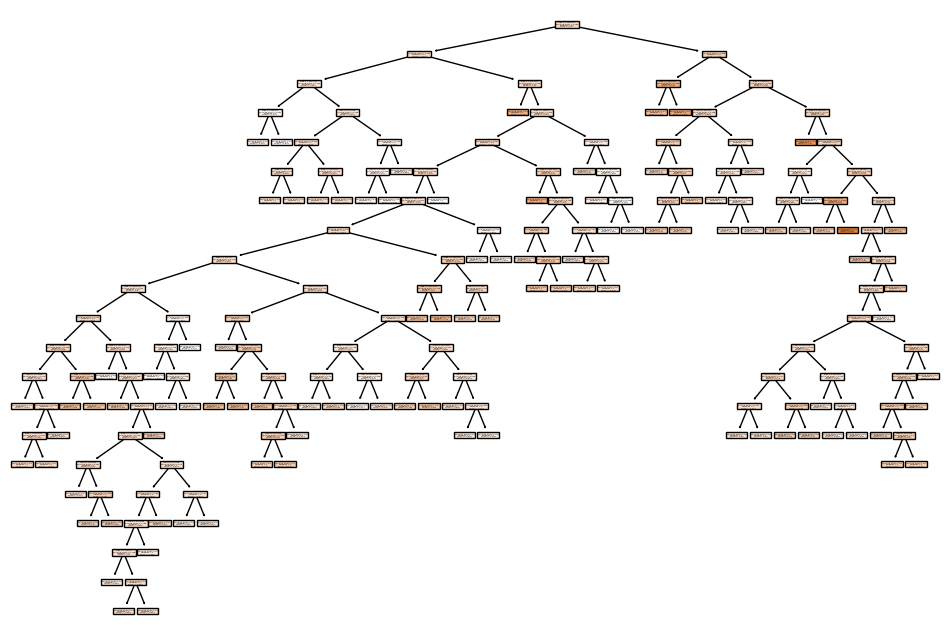

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names_list = X.columns.tolist()
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=feature_names_list)
plt.show()

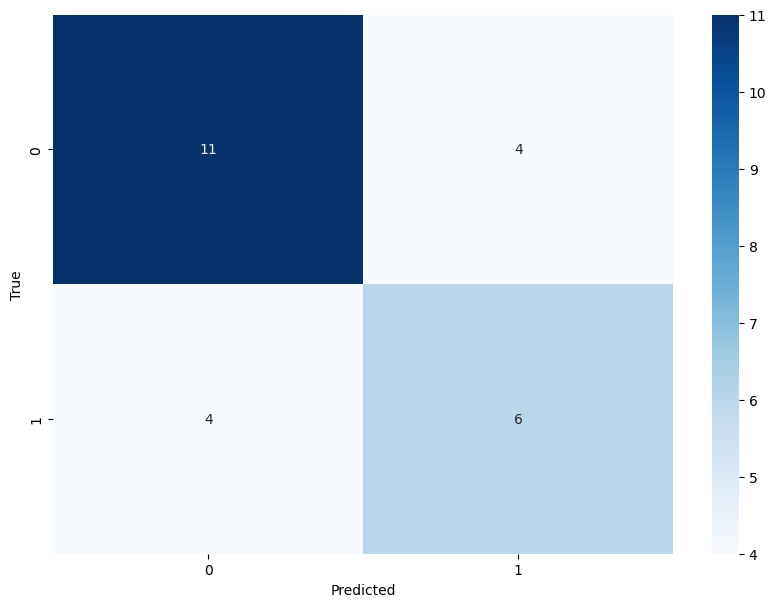

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()